In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Path to your CSV file
file_path = r'C:\Users\USER\Downloads\Stat..csv'

# Open the file in read mode
with open(file_path, 'r') as file:
    # Read the content of the file
    content = file.read()

# Print the raw content of the CSV file
print(content)

,,,,,,,,,,,,,
, Month ,,,,,,,,,,,,
 Country ,January,February,March,April,May,June,July,August,September,October,November,December,Totals
,"3,029.00","2,371.00","2,441.00","3,338.00","4,364.00","3,220.00","4,453.00","4,595.00","4,522.00","4,280.00","3,035.00","4,603.00","44,251.00"
ALBANIA,41,,,,,,,,,,,68,109
ALGERIA,,,,,,,,3,,,,,3
AMERICAN SAMOA,,,,,,,1,,,,,,1
ANDORRA,26,,,,,,,,,,,9,35
ANGOLA,,,,,2,,,,,,,,2
ANTARCTICA,,,,,25,10,,,,,3,,38
ARGENTINA,26,,6,26,78,48,,4,16,33,107,4,348
ARMENIA,,,5,,,,,31,7,,,,43
AUSTRALIA,101,57,87,181,298,350,484,299,908,"1,012.00",478,171,"4,426.00"
AUSTRIA,148,114,331,432,197,65,107,80,109,314,242,178,"2,317.00"
AZERBAIJAN,,,,50,8,,,,,,14,,72
BAHAMAS,,,1,,7,30,1,,,,,,39
BAHRAIN,27,49,,27,17,20,19,75,139,73,65,89,600
BANGLADESH,,,,,,,,,2,,,,2
BARBADOS,7,,,,,3,35,1,,,,28,74
BELARUS,,,,,,,,10,30,,,,40
BELGIUM,130,158,99,146,144,84,142,234,193,199,128,161,"1,818.00"
BOSNIA AND HERZEGOVI,,,,,,,,,,,1,,1
BRAZIL,82,129,107,111,286,428,295,91,166,238,169,33,"2,1

In [7]:
file_path = r"C:\Users\USER\Downloads\Stat..xlsx"

# Read the Excel file
table= pd.read_excel(file_path)

In [8]:
table

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Country,January,February,March,April,May,June,July,August,September,October,November,December,Totals
2,NaN,3029,2371,2441,3338,4364,3220,4453,4595,4522,4280,3035,4603,44251
3,ALBANIA,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,109
4,ALGERIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,VENEZUELA,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,6
124,VIET NAM,NaN,30,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,42
125,YEMEN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,7,28,NaN,40
126,ZIMBABWE,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7


In [9]:
table.columns = table.iloc[1]

# Drop row 2 (index 1) as it's now redundant
table = table.drop(1, axis=0).reset_index(drop=True)

In [10]:
table[table['Totals']==235224]

1,Country,January,February,March,April,May,June,July,August,September,October,November,December,Totals
126,Totals,13116,12791,15317,17382,20134,18010,24502,27018,25452,24757,18298,18447,235224


In [11]:

# Save the values of that row (excluding 'Country') to a variable
total = table.iloc[-1:,:]  # Exclude the 'Country' column (index 0)

In [12]:
table.columns

Index([' Country ', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December',
       'Totals'],
      dtype='object', name=1)

In [13]:
table = table.drop(table.index[-1])

# Reset the index (optional)
table = table.reset_index(drop=True)

In [14]:
table_new=table.iloc[2:,:]

In [15]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")
table_new.fillna(0, inplace=True)

In [16]:
x=table_new.iloc[:,0:1]

In [17]:
y=table_new.iloc[:,2:]

In [18]:
top_10_totals = table_new.sort_values(by='Totals', ascending=False).head(10)

In [19]:
country=top_10_totals.iloc[:,:-13]

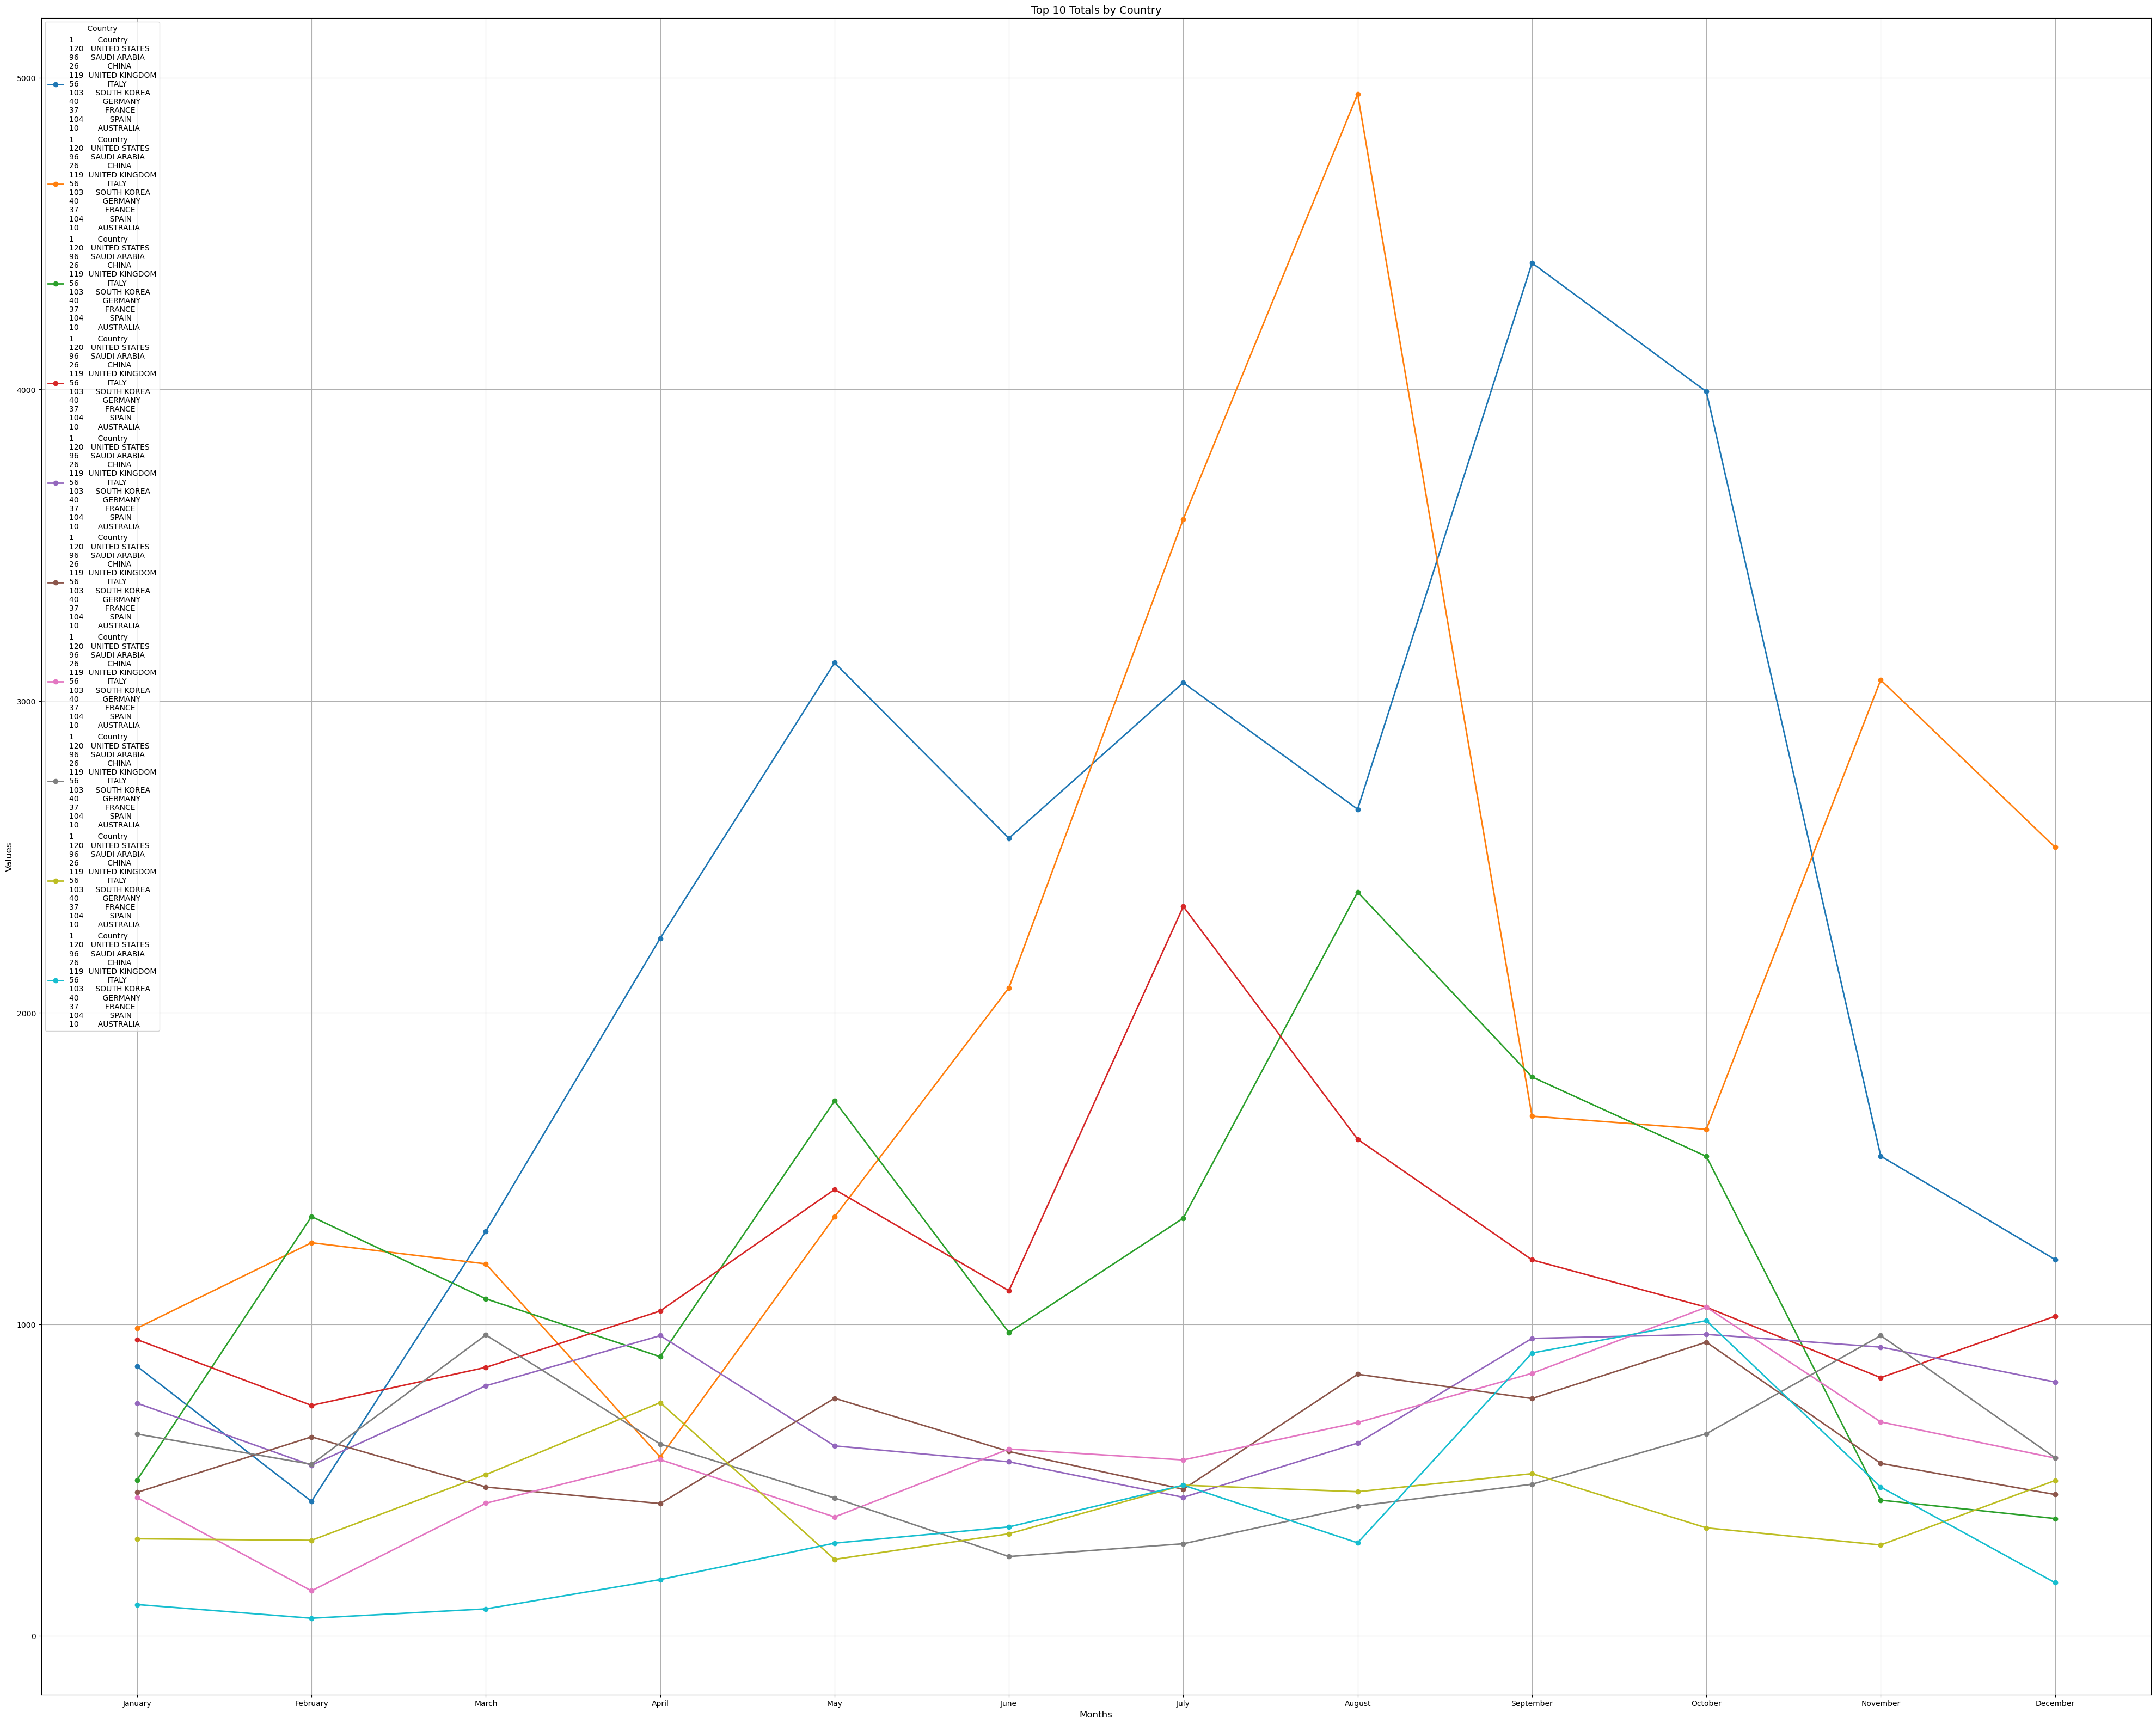

In [20]:
plt.figure(figsize=(50, 40))

# Loop through the top 10 rows and plot each row as a line
for index, row in top_10_totals.iterrows():
    # Use the 'Country' as the label for the line
    plt.plot(top_10_totals.columns[1:-1], row[1:-1], marker='o',label=country, linewidth=2)

# Customize the chart
plt.xlabel('Months', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Top 10 Totals by Country', fontsize=14)
plt.legend(title=' Country ', fontsize=10)
plt.grid(True)

# Display the plot
plt.show()

In [21]:
table_new

1,Country,January,February,March,April,May,June,July,August,September,October,November,December,Totals
2,ALBANIA,41,0,0,0,0,0,0,0,0,0,0,68,109
3,ALGERIA,0,0,0,0,0,0,0,3,0,0,0,0,3
4,AMERICAN SAMOA,0,0,0,0,0,0,1,0,0,0,0,0,1
5,ANDORRA,26,0,0,0,0,0,0,0,0,0,0,9,35
6,ANGOLA,0,0,0,0,2,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,URUGUAY,0,8,0,0,0,0,0,0,16,0,0,0,24
122,VENEZUELA,0,0,0,0,0,0,6,0,0,0,0,0,6
123,VIET NAM,0,30,8,0,0,0,0,0,0,0,0,4,42
124,YEMEN,0,0,0,0,0,5,0,0,0,7,28,0,40


In [22]:
table_new.columns = table_new.columns.str.strip()


In [23]:
table_new.set_index('Country', inplace=True)

In [24]:
table_new.head()

1,January,February,March,April,May,June,July,August,September,October,November,December,Totals
Country,,,,,,,,,,,,,
ALBANIA,41,0,0,0,0,0,0,0,0,0,0,68,109
ALGERIA,0,0,0,0,0,0,0,3,0,0,0,0,3
AMERICAN SAMOA,0,0,0,0,0,0,1,0,0,0,0,0,1
ANDORRA,26,0,0,0,0,0,0,0,0,0,0,9,35
ANGOLA,0,0,0,0,2,0,0,0,0,0,0,0,2


In [25]:
top_10_totals = table_new.sort_values(by='Totals', ascending=False).head(10)

In [26]:
import seaborn as sns 

<Axes: xlabel='1', ylabel='Country'>

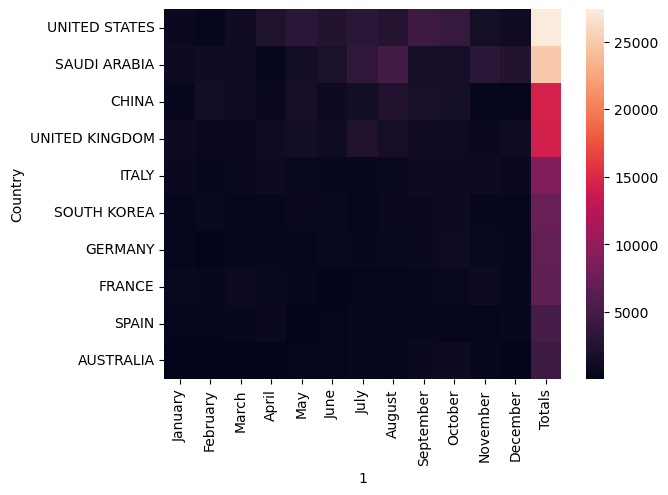

In [27]:
sns.heatmap(top_10_totals)

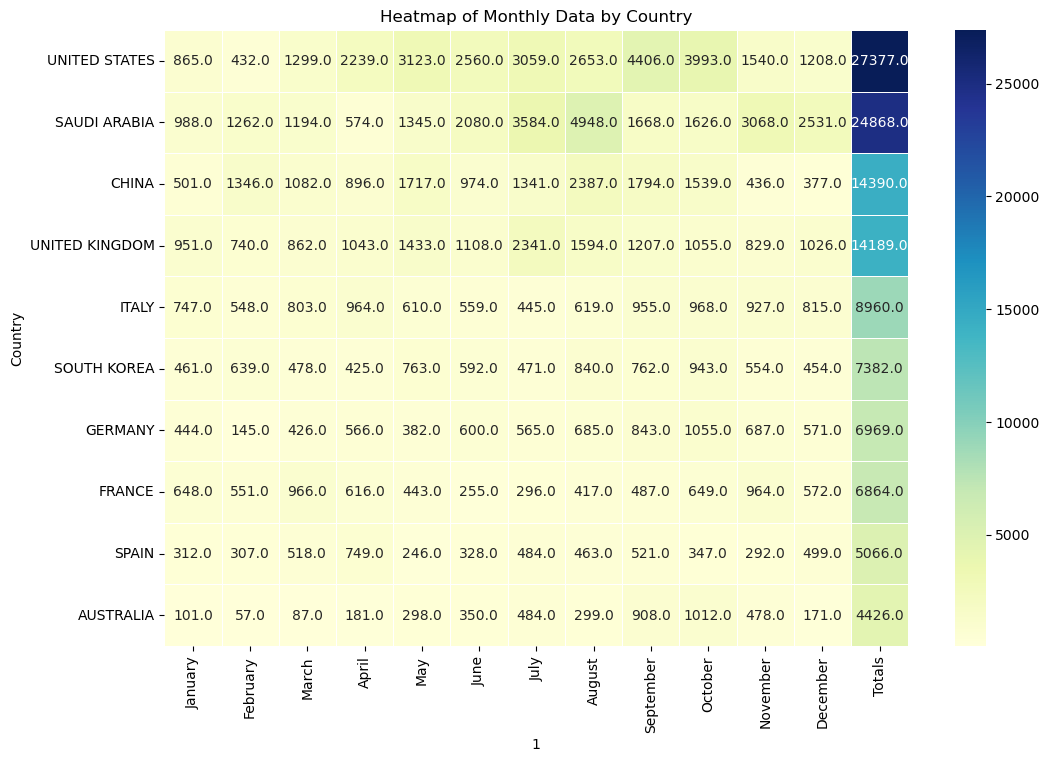

In [28]:
table_new1 = top_10_totals.apply(pd.to_numeric, errors='coerce')
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(top_10_totals,annot=True, fmt=".1f", linewidths=.5, cmap="YlGnBu")

# Show the plot
plt.title('Heatmap of Monthly Data by Country')
plt.show()

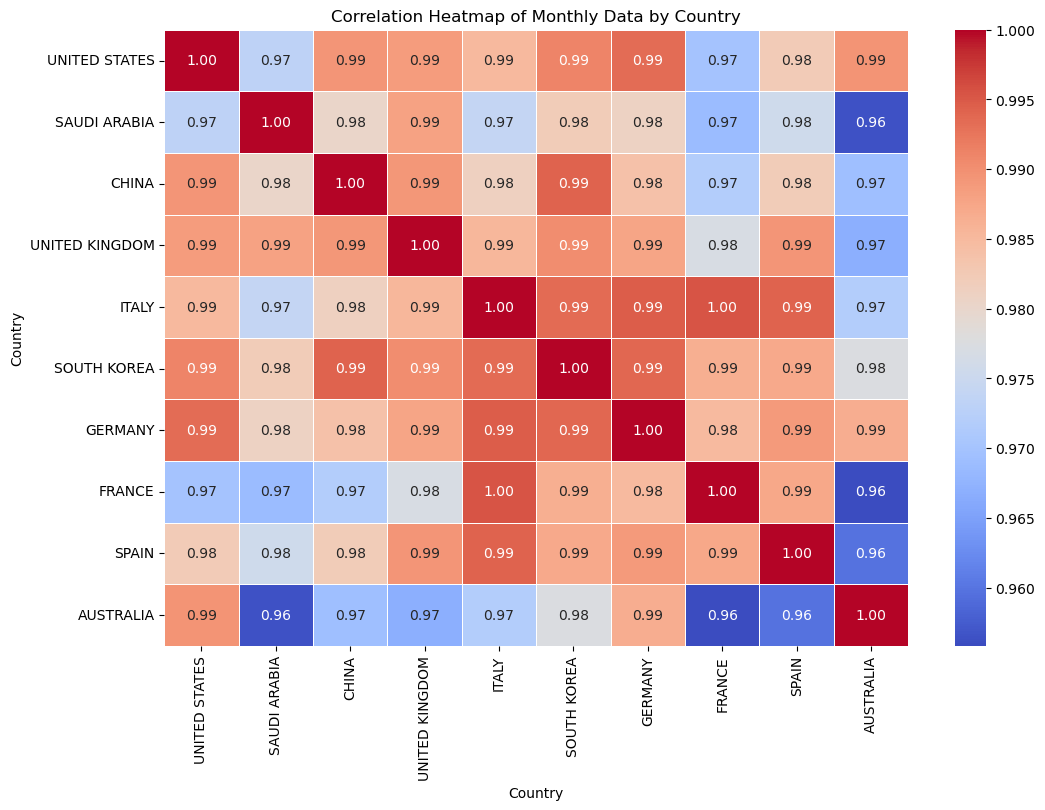

In [29]:

# Compute the correlation matrix
correlation_matrix = top_10_totals.T.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,annot=True ,fmt=".2f", linewidths=.5, cmap="coolwarm")

# Show the plot
plt.title('Correlation Heatmap of Monthly Data by Country')
plt.show()

In [30]:



import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point


In [31]:
import geopy

# Confirm the installation by printing the version of geopy
print(geopy.__version__)

2.4.1


In [39]:
top_10_totals 

1,January,February,March,April,May,June,July,August,September,October,November,December,Totals
Country,,,,,,,,,,,,,
UNITED STATES,865,432,1299,2239,3123,2560,3059,2653,4406,3993,1540,1208,27377
SAUDI ARABIA,988,1262,1194,574,1345,2080,3584,4948,1668,1626,3068,2531,24868
CHINA,501,1346,1082,896,1717,974,1341,2387,1794,1539,436,377,14390
UNITED KINGDOM,951,740,862,1043,1433,1108,2341,1594,1207,1055,829,1026,14189
ITALY,747,548,803,964,610,559,445,619,955,968,927,815,8960
SOUTH KOREA,461,639,478,425,763,592,471,840,762,943,554,454,7382
GERMANY,444,145,426,566,382,600,565,685,843,1055,687,571,6969
FRANCE,648,551,966,616,443,255,296,417,487,649,964,572,6864
SPAIN,312,307,518,749,246,328,484,463,521,347,292,499,5066


In [98]:
import pandas as pd

data = {
    'January': [865, 988, 501, 951, 747, 461, 444, 648, 312, 101],
    'February': [432, 1262, 1346, 740, 548, 639, 145, 551, 307, 57],
    'March': [1299, 1194, 1082, 862, 803, 478, 426, 966, 518, 87],
    'April': [2239, 574, 896, 1043, 964, 425, 566, 616, 749, 181],
    'May': [3123, 1345, 1717, 1433, 610, 763, 382, 443, 246, 298],
    'June': [2560, 2080, 974, 1108, 559, 592, 600, 255, 328, 350],
    'July': [3059, 3584, 1341, 2341, 445, 471, 565, 296, 484, 484],
    'August': [2653, 4948, 2387, 1594, 619, 840, 685, 417, 463, 299],
    'September': [4406, 1668, 1794, 1207, 955, 762, 843, 487, 521, 908],
    'October': [3993, 1626, 1539, 1055, 968, 943, 1055, 649, 347, 1012],
    'November': [1540, 3068, 436, 829, 927, 554, 687, 964, 292, 478],
    'December': [1208, 2531, 377, 1026, 815, 454, 571, 572, 499, 171],
    'Totals': [27377, 24868, 14390, 14189, 8960, 7382, 6969, 6864, 5066, 4426]
}

index = ['UNITED STATES', 'SAUDI ARABIA', 'CHINA', 'UNITED KINGDOM', 'ITALY', 'SOUTH KOREA', 'GERMANY', 'FRANCE', 'SPAIN', 'AUSTRALIA']

table_new = pd.DataFrame(data, index=index)

# Add Latitude and Longitude manually for demonstration purposes
coordinates = {
    'UNITED STATES': (37.0902, -95.7129),
    'SAUDI ARABIA': (23.8859, 45.0792),
    'CHINA': (35.8617, 104.1954),
    'UNITED KINGDOM': (55.3781, -3.4360),
    'ITALY': (41.8719, 12.5674),
    'SOUTH KOREA': (35.9078, 127.7669),
    'GERMANY': (51.1657, 10.4515),
    'FRANCE': (46.6034, 1.8883),
    'SPAIN': (40.4637, -3.7492),
    'AUSTRALIA': (-25.2744, 133.7751)
}

table_new['Latitude'] = table_new.index.to_series().map(lambda country: coordinates[country][0])
table_new['Longitude'] = table_new.index.to_series().map(lambda country: coordinates[country][1])

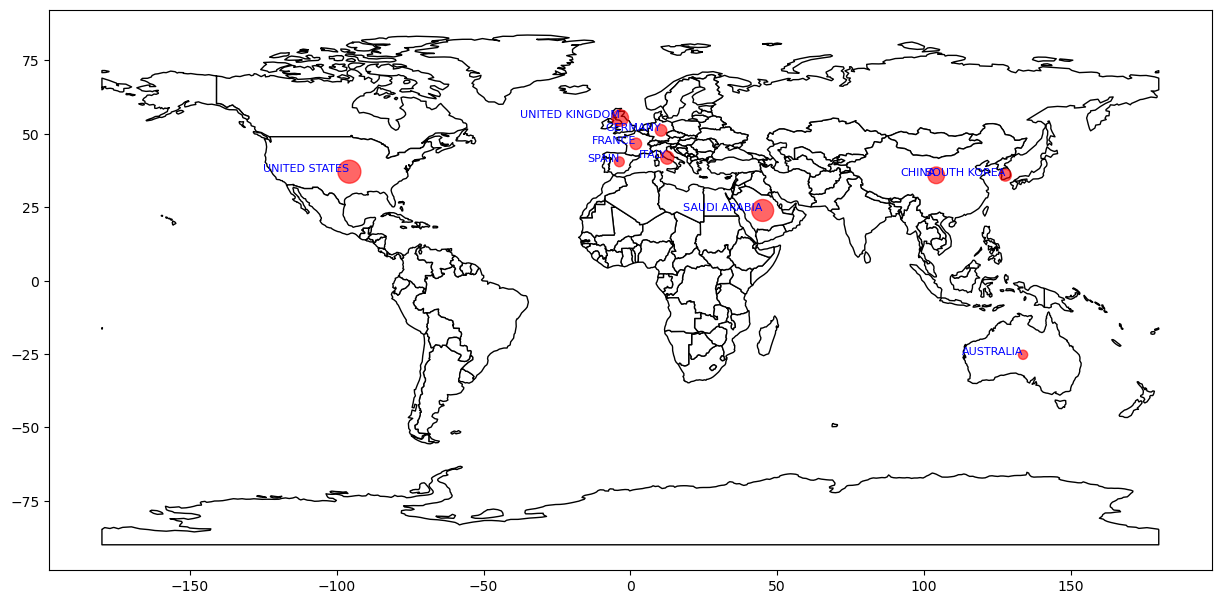

In [104]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Use raw string to specify the file path
path_to_shapefile = r"C:\Users\USER\Downloads\110m_cultural.zip"

# Load the world map
world = gpd.read_file(path_to_shapefile)

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(table_new['Longitude'], table_new['Latitude'])]
gdf = gpd.GeoDataFrame(table_new, geometry=geometry)

# Plot the world map
ax = world.plot(figsize=(15, 10), color='white', edgecolor='black')

# Plot the points from the GeoDataFrame
gdf.plot(ax=ax, color='red', markersize=gdf['Totals']*0.01, alpha=0.6)  # Adjust markersize as needed

# Add labels for the points
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.index):
    plt.text(x, y, label, fontsize=8, ha='right', color='blue')

plt.show()